In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set()

A regression line is a line of best fit for a particular dataset. It allows us to make predictions for a dependent variable $y$, which is correlated with an independent variable $x$.

### Dataset - Suicide Rates Overview 1985 to 2016
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [70]:
df = pd.read_csv('master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_year($),gdp_per_capita($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [85]:
# Convert GDP to int
df['gdp_per_year($)'] = df['gdp_per_year($)'].map(lambda x: int(x.replace(',','')))

In [265]:
def plot_scatter(df,col1,col2,regression_line = None):
    print(f'Correlation: {df[col1].corr(df[col2])}')

        
    plt.figure(figsize=(12,8))
    plt.xlabel(col1.replace('_',' '))
    plt.ylabel(col2.replace('_',' '))
    plt.scatter(df[col1],df[col2])    
    
    if regression_line:
        x,y = regression_line
        plt.plot(x,y,color='red')
    plt.show()

Correlation: 0.7106973227934164


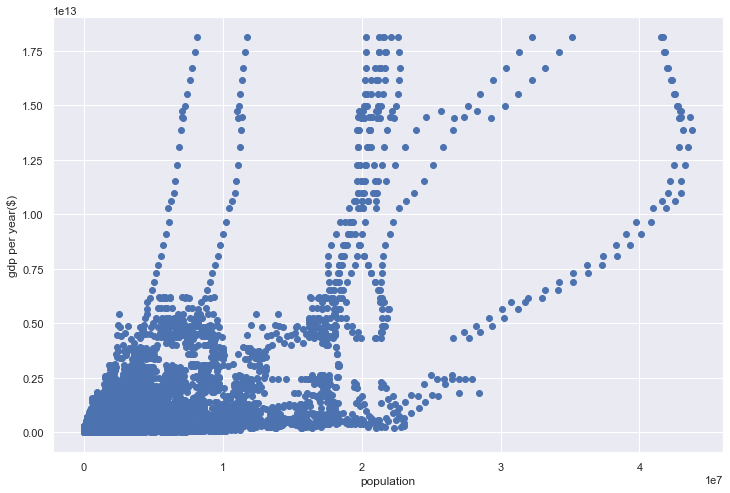

In [267]:
plot_scatter(df,'population','gdp_per_year($)')

We can see that there is a strong positive correlation between the population and GDP earned by year by a particular country,
indicated by the Pearson's R value of $~0.711$.

#### Note that the regression formula is:

$$a + bx$$

#### where:

$$b = r(\frac{\sigma_y}{\sigma_x})$$\
$$a = \bar{y} - b * \bar{x}$$

In [260]:
x = df['population']

y = df['gdp_per_year($)']
N = len(df)   # Population mean

# Standard deviation of X and Y
sx = np.sqrt(((x - x.mean()) ** 2).sum() / N)
sy = np.sqrt(((y - y.mean()) ** 2).sum() / N)

# Z-score for X and Y
zx = (x - x.mean()) / sx
zy = (y - y.mean()) / sy

# Pearson's R
r = sum(zx * zy) / (N - 1)

# Regression formula
b = r * (sy / sx)
a = y.mean() - (b * x.mean())

y1 = a + b * x

print(f'Regression line: {a} + {b}x')

Regression line: -41635113905.65863 + 264103.30041075265x


Correlation: 0.7106973227934164


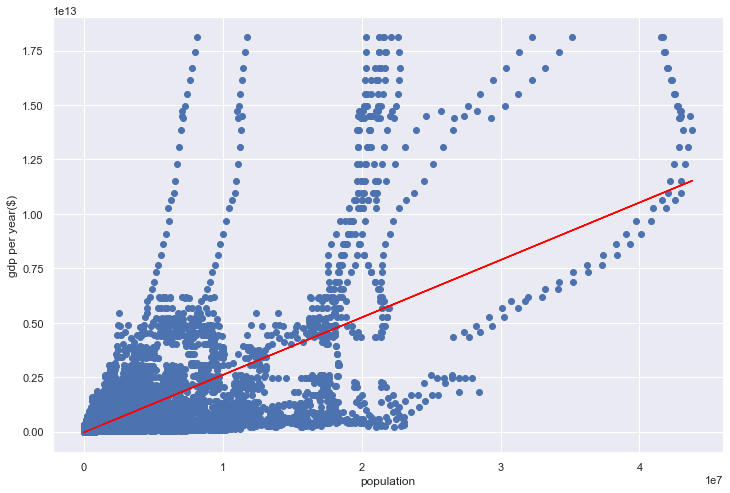

In [266]:
plot_scatter(df,'population','gdp_per_year($)',(x,y1))